# Importing Required Modules

In [1]:
from csv import reader
from scipy.stats import spearmanr
import userfunction
import pandas as pd
from scipy.stats import zscore
from operator import itemgetter
import matplotlib.pyplot as plt

# Reading timeseries data and converting each time series into a list

In [2]:
AllTimeSeries=[]
with open('hctsa_timeseries-data.csv','r') as read_obj:
    csv_reader=reader(read_obj)
    li=list(csv_reader)
    for i in li:
        AllTimeSeries.append(list(map(float,i)))

# Importing Datamatrix

In [5]:
featurematrix=pd.read_csv('hctsa_datamatrix.csv')

In [6]:
featurematrix

,length,mean,harmonic_mean,median,trimmed_mean_1,trimmed_mean_5,trimmed_mean_10,trimmed_mean_25,trimmed_mean_50,midhinge,...,MD_pNN_raw_pnn60,MD_pNN_raw_pnn70,MD_pNN_raw_pnn80,MD_pNN_raw_pnn90,MD_pNN_raw_pnn100,MD_rawHRVmeas_tri10,MD_rawHRVmeas_tri20,MD_rawHRVmeas_trisqrt,MD_rawHRVmeas_SD1,MD_rawHRVmeas_SD2
0,10000,0.24711,0.035691,0.20297,0.24524,0.23951,0.23390,0.22249,0.21148,0.22812,...,0.79618,0.76558,0.73587,0.70527,0.67567,3.6805,7.2202,32.3620,191.16,193.05
1,10000,0.28390,0.229690,0.27253,0.28323,0.28161,0.28024,0.27740,0.27487,0.27812,...,0.70857,0.66567,0.62266,0.58226,0.54235,4.0112,7.8802,54.9450,116.54,115.72
2,10000,0.57048,0.498890,0.57781,0.57087,0.57194,0.57278,0.57440,0.57613,0.57306,...,0.81598,0.78498,0.75698,0.72677,0.69727,4.9900,9.8328,43.4780,174.80,174.76
3,1000,0.37851,0.292680,0.36738,0.37775,0.37586,0.37456,0.37080,0.36706,0.37080,...,0.80080,0.77277,0.73373,0.70370,0.66466,4.9751,9.9010,12.8210,161.26,168.77
4,1000,0.45108,0.384350,0.44266,0.45094,0.45024,0.44957,0.44861,0.44643,0.45130,...,0.78779,0.75175,0.70671,0.67768,0.64264,4.3478,8.1301,11.1110,156.29,151.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3000,-396.47000,-376.960000,-378.00000,-403.36000,-417.56000,-416.22000,-408.15000,-388.43000,-433.50000,...,0.95565,0.95565,0.95565,0.95565,0.95565,1.6511,3.0090,6.3694,41882.00,472000.00
996,5800,21.36500,0.000000,-1.00000,20.40100,16.89500,13.71600,5.14370,-1.76070,7.50000,...,0.61804,0.61804,0.61804,0.61804,0.61804,3.6616,4.9658,14.9480,771.25,122000.00
997,7000,-496.84000,0.000000,-622.00000,-499.63000,-510.73000,-524.50000,-566.64000,-613.01000,-568.50000,...,0.86798,0.86798,0.86798,0.86798,0.86798,1.8363,3.3784,15.3510,10509.00,389000.00
998,5900,1803.60000,1803.600000,1804.00000,1803.60000,1803.60000,1803.60000,1803.60000,1803.60000,1803.50000,...,0.74792,0.74792,0.74792,0.74792,0.74792,2.7378,5.2444,5.2444,1135.90,2863.10


# Reading the analysis method name, z-soring time-series, passing each time series to analysis method and generates long feature vector.

In [7]:
fvector=[]
invalidts=[]
funcname=input("enter function") 
from statsmodels.tsa.ar_model import AR
for i in range(len(AllTimeSeries)):
    try:
        z_timeseries=pd.DataFrame(AllTimeSeries[i]).apply(zscore)
        yhat=getattr(userfunction,funcname)(z_timeseries.values)
        fvector.append(yhat)
    except ValueError as v:
        invalidts.append(i)
fvector=pd.DataFrame(fvector)

enter functionanalysismodel


c:\users\dell\python37\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [8]:
fvector

,0
0,-0.001737
1,-0.051106
2,0.084615
3,0.001487
4,0.152287
...,...
995,-0.573460
996,-0.517775
997,-0.037516
998,1.685643


# Finding the column names having missing data more than the threshold limit.

In [9]:
missing=[]
final=[]
def CheckMissing(featurematrix,threshold):
    for i in range(len(featurematrix.columns)):
        if (featurematrix.iloc[:,i].isna().sum()*100/featurematrix.iloc[:,i].shape[0])>threshold:
            missing.append(featurematrix.columns[i])
        else:
            final.append(i)
    print(f"Columns having more then {threshold} Missing values are : {len(missing)}")
    print(missing)
    return final
finalfeatures=CheckMissing(featurematrix,70)

Columns having more then 70 Missing values are : 7
['HT_DistributionTest_chi2exp100', 'HT_DistributionTest_chi2wbl5', 'DN_CompareKSFit_rayleigh_relent', 'DN_CompareKSFit_exp_relent', 'DN_CompareKSFit_gamma_relent', 'DN_CompareKSFit_logn_relent', 'DN_CompareKSFit_wbl_relent']


# Comparison of Each column from datamatrix with feature vector using Spearman's correlations.

In [10]:
alpha=0.05
notrelated=[]
nan_fvector=int(fvector.isna().sum())
correlatedfeatures=[]
for i in finalfeatures:
    eachfeature=[]
    if ((featurematrix.iloc[:,i].isna().sum()+nan_fvector)<=50:
        try:
            coef, p = spearmanr(featurematrix.iloc[:,i], fvector,nan_policy="omit")
            if p < alpha:
                eachfeature=["feature name is ",featurematrix.columns[i],"p value : ",p ,"coef value :", coef,"columnid=",i]
                correlatedfeatures.append(eachfeature)
            else:
                eachfeature=["feature name is ",featurematrix.columns[i],"p value : ",p ,"coef value :", coef]
                notrelated.append(eachfeature)
        except:
             eachfeature=["feature name is ",featurematrix.columns[i],"p value : ",p ,"coef value :", coef]
             notrelated.append(eachfeature)
len(correlatedfeatures)

c:\users\dell\python37\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\dell\python37\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\users\dell\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\dell\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\dell\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


467

In [11]:
correlatedfeatures

[['feature name is ',
  'DN_Withinp_25',
  'p value : ',
  0.04435436328549483,
  'coef value :',
  -0.06359991691966471,
  'columnid=',
  48],
 ['feature name is ',
  'AC_18',
  'p value : ',
  0.024345978121103288,
  'coef value :',
  -0.07120130405571971,
  'columnid=',
  109],
 ['feature name is ',
  'AC_19',
  'p value : ',
  0.032530281386612715,
  'coef value :',
  -0.06761141581425006,
  'columnid=',
  110],
 ['feature name is ',
  'CO_CompareMinAMI_std1_2_80_range',
  'p value : ',
  0.049831486165247955,
  'coef value :',
  -0.062042993891043875,
  'columnid=',
  448],
 ['feature name is ',
  'CO_CompareMinAMI_std1_2_80_std',
  'p value : ',
  0.0327154432011226,
  'coef value :',
  -0.06753962938724517,
  'columnid=',
  451],
 ['feature name is ',
  'SY_Trend_gradient',
  'p value : ',
  2.714952501328282e-07,
  'coef value :',
  0.16174209061929148,
  'columnid=',
  741],
 ['feature name is ',
  'SY_Trend_intercept',
  'p value : ',
  6.163080878946173e-08,
  'coef value :'

# Sorting and listing the best matches

In [12]:
BestMatches=sorted(correlatedfeatures,key=itemgetter(5))[::-1][:10]
for i in BestMatches:
    print(i,"\n")

['feature name is ', 'MF_AR_arcov_1_res_mu', 'p value : ', 6.012791240549786e-197, 'coef value :', 0.7699722680590287, 'columnid=', 3834] 

['feature name is ', 'MF_AR_arcov_3_res_mu', 'p value : ', 9.831579475140045e-128, 'coef value :', 0.6631949587679438, 'columnid=', 3849] 

['feature name is ', 'MF_AR_arcov_2_res_mu', 'p value : ', 1.7517752523421838e-110, 'coef value :', 0.6272806825456884, 'columnid=', 3841] 

['feature name is ', 'MF_AR_arcov_4_res_mu', 'p value : ', 3.5049715391570204e-103, 'coef value :', 0.6105184484544444, 'columnid=', 3858] 

['feature name is ', 'MF_AR_arcov_5_res_mu', 'p value : ', 6.526035862050767e-103, 'coef value :', 0.6098788388939407, 'columnid=', 3868] 

['feature name is ', 'MF_armax_1_1_05_1_meane', 'p value : ', 2.639877545324552e-10, 'coef value :', 0.19807567385835495, 'columnid=', 7311] 

['feature name is ', 'SY_LocalGlobal_median_unicg10', 'p value : ', 1.0222006325948126e-08, 'coef value :', 0.17985001292911304, 'columnid=', 794] 

['feat

# Plotting the best matches

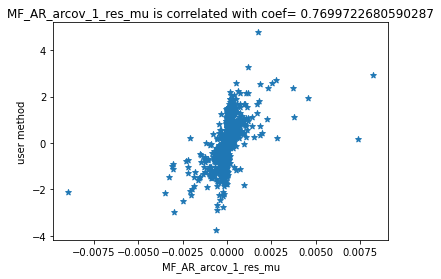

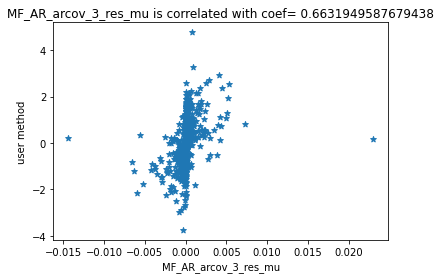

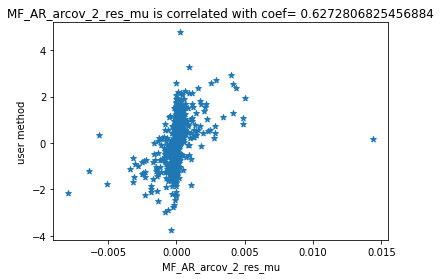

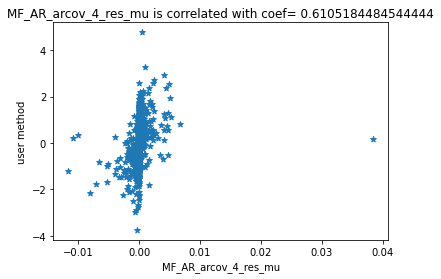

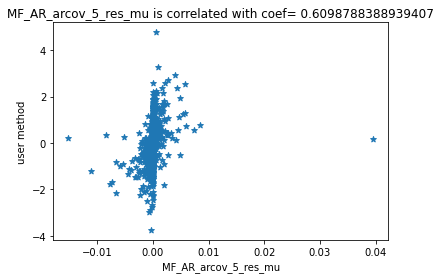

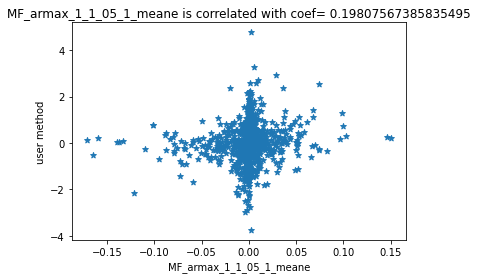

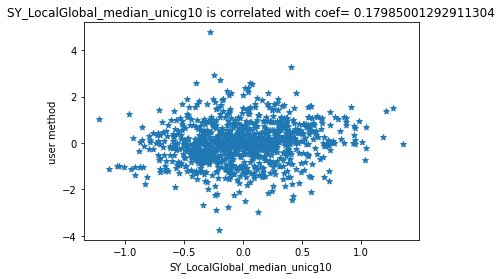

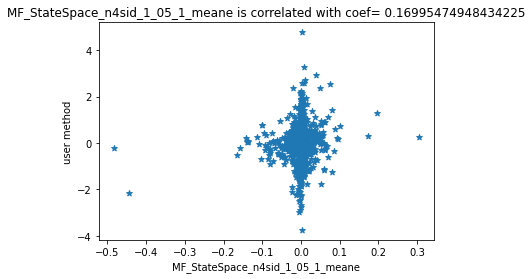

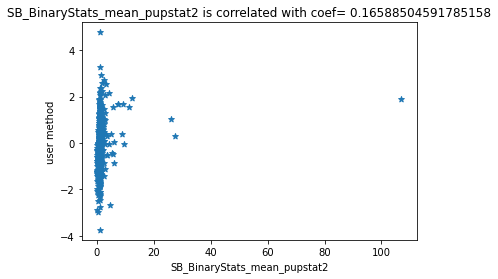

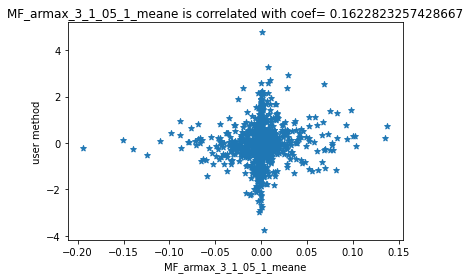

<Figure size 432x288 with 0 Axes>

In [13]:
for i in BestMatches:
    plt.scatter(featurematrix.iloc[:,i[7]],fvector,marker='*')
    plt.title(f"{i[1]} is correlated with coef= {i[5]}")
    plt.xlabel(i[1])
    plt.ylabel("user method")
    plt.figure()